In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn
import pymc3 as pm
% matplotlib inline

In [ ]:
dfJeremy = pd.read_pickle('./pickleJar/dfJeremy.pkl')
dfGIOP = pd.read_pickle('./pickleJar/dfGIOP.pkl')

In [111]:
dfGIOP411 = GetSingleBandDataFrame(dfGIOP, 411)
dfGIOP443 = GetSingleBandDataFrame(dfGIOP, 443)
dfGIOP489 = GetSingleBandDataFrame(dfGIOP, 489)
dfGIOP510 = GetSingleBandDataFrame(dfGIOP, 510)
dfGIOP555 = GetSingleBandDataFrame(dfGIOP, 555)

In [115]:
dfGIOP411.dropna(inplace=True)
dfGIOP411.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 1286 to 1718
Data columns (total 7 columns):
rrs411       89 non-null float64
adg411       89 non-null float64
bbp411       89 non-null float64
aph411       89 non-null float64
a411         89 non-null float64
bb411        89 non-null float64
rrs411sub    89 non-null float64
dtypes: float64(7)
memory usage: 5.6 KB


In [116]:
dfGIOP443.dropna(inplace=True)
dfGIOP443.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 1286 to 1718
Data columns (total 7 columns):
rrs443       95 non-null float64
adg443       95 non-null float64
bbp443       95 non-null float64
aph443       95 non-null float64
a443         95 non-null float64
bb443        95 non-null float64
rrs443sub    95 non-null float64
dtypes: float64(7)
memory usage: 5.9 KB


In [117]:
dfGIOP489.dropna(inplace=True)
dfGIOP489.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 1286 to 1718
Data columns (total 7 columns):
rrs489       95 non-null float64
adg489       95 non-null float64
bbp489       95 non-null float64
aph489       95 non-null float64
a489         95 non-null float64
bb489        95 non-null float64
rrs489sub    95 non-null float64
dtypes: float64(7)
memory usage: 5.9 KB


In [118]:
dfGIOP510.dropna(inplace=True)
dfGIOP510.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 1286 to 1718
Data columns (total 7 columns):
rrs510       95 non-null float64
adg510       95 non-null float64
bbp510       95 non-null float64
aph510       95 non-null float64
a510         95 non-null float64
bb510        95 non-null float64
rrs510sub    95 non-null float64
dtypes: float64(7)
memory usage: 5.9 KB


In [119]:
dfGIOP555.dropna(inplace=True)
dfGIOP555.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 1286 to 1718
Data columns (total 7 columns):
rrs555       92 non-null float64
adg555       92 non-null float64
bbp555       92 non-null float64
aph555       92 non-null float64
a555         92 non-null float64
bb555        92 non-null float64
rrs555sub    92 non-null float64
dtypes: float64(7)
memory usage: 5.8 KB


In [120]:
with pm.Model() as giop1:
    g1 = pm.Normal('g1', 0, sd=1)
    g2 = pm.Normal('g2', 0, sd=1)
    epsilon = pm.HalfCauchy('epsilon',beta=2)
    u = dfGIOP443.bb443 / (dfGIOP443.bb443 + dfGIOP443.a443)
    lklhd = pm.Normal('lklhd', mu=g1*u + g2*u**2, sd=epsilon,
                     observed=dfGIOP443.rrs443sub)
    start=pm.find_MAP()
    step=pm.NUTS()
    trace_giop1 = pm.sample(10000, start=start, step=step)

Applied log-transform to epsilon and added transformed epsilon_log_ to model.
100%|██████████| 10000/10000 [00:39<00:00, 251.17it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d5f2f2f60>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d55444320>]], dtype=object)

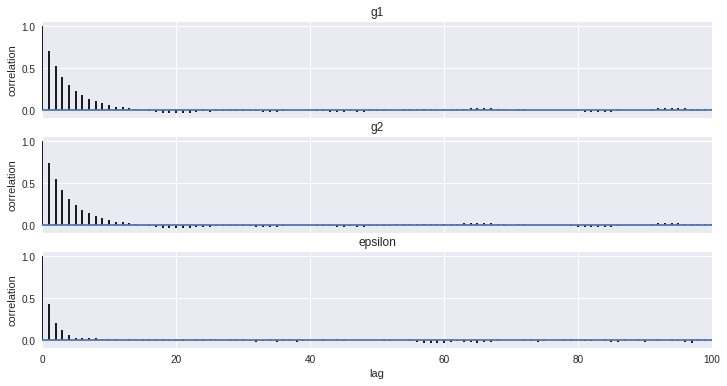

In [121]:
pm.autocorrplot(trace_giop1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d543c9dd8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f4d542ba668>], dtype=object)

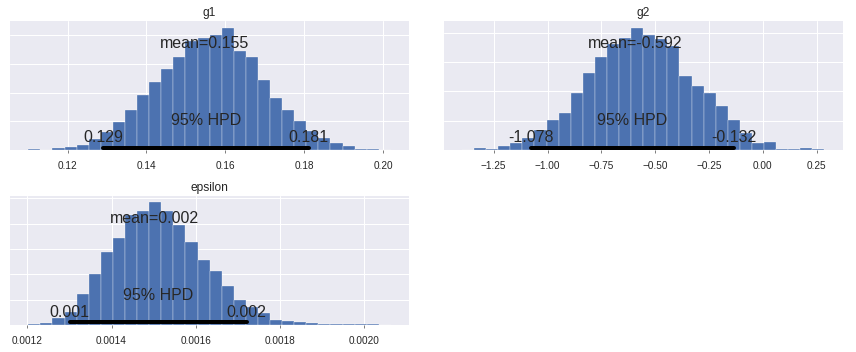

In [122]:
pm.plot_posterior(trace_giop1[1000:]);